In [1]:
import seaborn as sns
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')



data = pd.read_csv("cutomer_binning.csv")
data.head()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Weekend_special
0,0,0,0,0,0,0,0,0,0,0.0,0.0,1,1,1,1,1,1,False,False,False
1,1,0,0,0,0,0,0,1,0,0.0,0.0,1,2,2,1,2,1,False,False,False
2,2,0,0,0,0,0,0,0,0,0.0,0.0,1,4,1,9,3,1,False,False,False
3,3,0,0,0,0,0,0,0,0,0.0,0.0,1,3,2,2,4,1,False,False,False
4,4,0,0,0,0,1,2,0,0,0.0,0.0,1,3,3,1,4,1,True,False,False


In [2]:
data=data.drop('Unnamed: 0',axis=1)

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Weekend_special
0,0,0,0,0,0,0,0,0,0.0,0.0,1,1,1,1,1,1,False,False,False
1,0,0,0,0,0,0,1,0,0.0,0.0,1,2,2,1,2,1,False,False,False
2,0,0,0,0,0,0,0,0,0.0,0.0,1,4,1,9,3,1,False,False,False
3,0,0,0,0,0,0,0,0,0.0,0.0,1,3,2,2,4,1,False,False,False
4,0,0,0,0,1,2,0,0,0.0,0.0,1,3,3,1,4,1,True,False,False


In [4]:
data.shape

(12330, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 19 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null int64
Informational              12330 non-null int64
Informational_Duration     12330 non-null int64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null int64
BounceRates                12330 non-null int64
ExitRates                  12330 non-null int64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null int64
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null int64
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
Weekend_special          

In [6]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
Weekend_special            0
dtype: int64

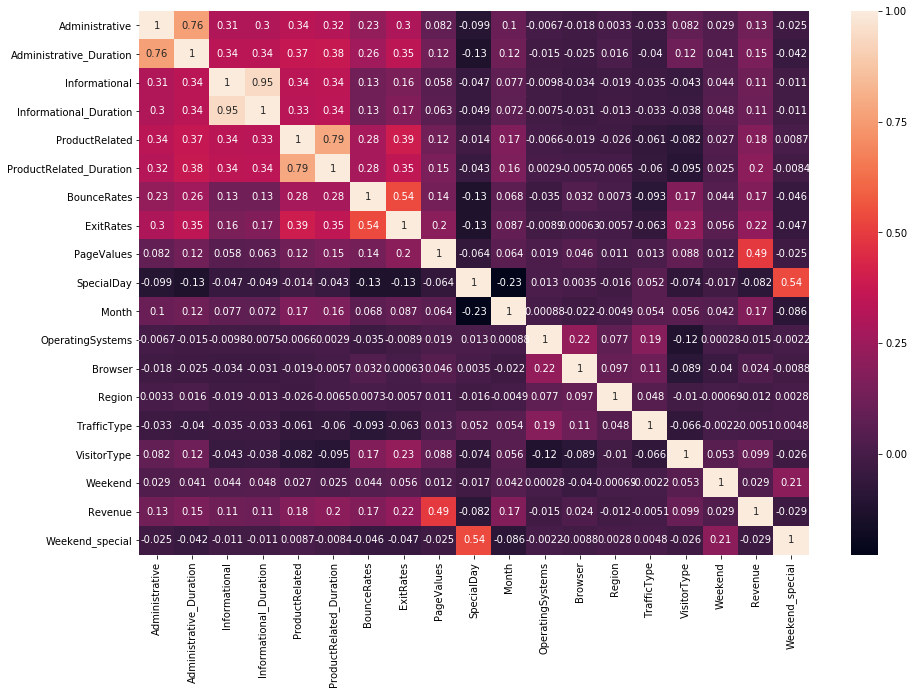

In [7]:
corr_tab=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_tab,annot=True)
plt.show()

In [8]:
## Is threre class imbalance issue in dataset?

data.Revenue.value_counts()/data.shape[0]   #class Imbalance Issue exist in the dataset,
                                            #so accuracy will not be enough as an evaluation matrix!

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

In [9]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Weekend_special
0,0,0,0,0,0,0,0,0,0.0,0.0,1,1,1,1,1,1,False,False,False
1,0,0,0,0,0,0,1,0,0.0,0.0,1,2,2,1,2,1,False,False,False
2,0,0,0,0,0,0,0,0,0.0,0.0,1,4,1,9,3,1,False,False,False
3,0,0,0,0,0,0,0,0,0.0,0.0,1,3,2,2,4,1,False,False,False
4,0,0,0,0,1,2,0,0,0.0,0.0,1,3,3,1,4,1,True,False,False


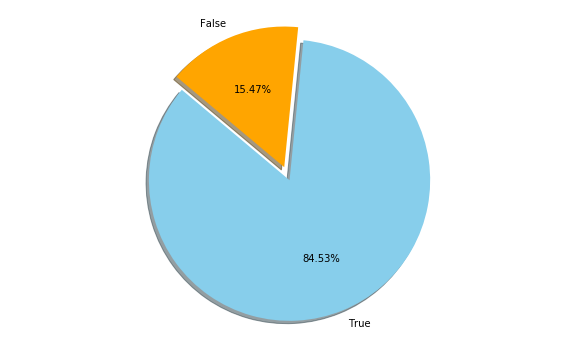

In [11]:
# Data to plot
labels = 'True', 'False'

sizes = []
length = data['Revenue'].shape[0]
for i in data['Revenue'].value_counts().values:
    sizes.append(round((i/length*100),2))
    
colors = ['skyblue', 'orange']
explode = (0.1, 0)  # explode 1st slice

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%'.format(p=pct)
    return my_autopct

# Plot
plt.figure(figsize=(10,6))

plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140, autopct=make_autopct(sizes),)
#plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()



In [12]:
data['Weekend']=data['Weekend'].astype('category')
data['Revenue']=data['Revenue'].astype('category')

In [13]:
data=pd.get_dummies(data,drop_first=True)

In [14]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend_special,Weekend_True,Revenue_True
0,0,0,0,0,0,0,0,0,0.0,0.0,1,1,1,1,1,1,False,0,0
1,0,0,0,0,0,0,1,0,0.0,0.0,1,2,2,1,2,1,False,0,0
2,0,0,0,0,0,0,0,0,0.0,0.0,1,4,1,9,3,1,False,0,0
3,0,0,0,0,0,0,0,0,0.0,0.0,1,3,2,2,4,1,False,0,0
4,0,0,0,0,1,2,0,0,0.0,0.0,1,3,3,1,4,1,False,1,0


In [16]:
## Preparing data to build prediction model

### Independent Variables
x = data.drop('Revenue_True',axis=1)

### dependent variable 
y = data['Revenue_True']

from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [17]:
## from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# xsc=sc.fit_transform(x)

from imblearn.over_sampling import SMOTE 

sm=SMOTE(ratio=0.6)
x1,y1=sm.fit_sample(x,y)

x2 = pd.DataFrame(x1,columns=x.columns)

y2 = pd.DataFrame(y1)

y2[0].value_counts()

Using TensorFlow backend.


0    10422
1     6253
Name: 0, dtype: int64

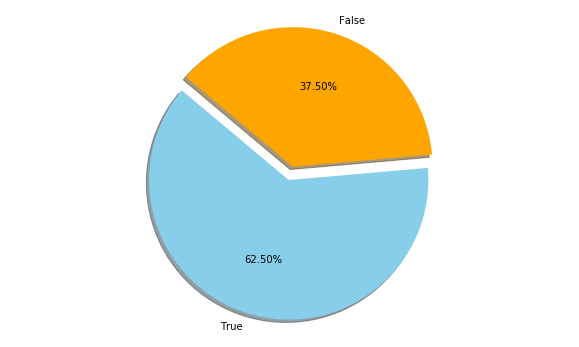

In [19]:
# Data to plot
labels = 'True', 'False'

sizes = []
length = y2[0].shape[0]
for i in y2[0].value_counts().values:
    sizes.append(round((i/length*100),2))
    
colors = ['skyblue', 'orange']
explode = (0.1, 0)  # explode 1st slice

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%'.format(p=pct)
    return my_autopct

# Plot
plt.figure(figsize=(10,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140, autopct=make_autopct(sizes),)
#plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.show()




In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x2,y2,test_size=0.2,random_state=123,stratify=y2)

In [ ]:
xtrain.head()

In [ ]:
xtrain.info()

In [ ]:
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('LogisticRegression'   , LogisticRegression()))
    basedModels.append(('LinearDiscriminantAnalysis'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNeighborsClassifier'  , KNeighborsClassifier()))
    basedModels.append(('DecisionTreeClassifier' , DecisionTreeClassifier()))
    basedModels.append(('GaussianNB'   , GaussianNB()))
    basedModels.append(('AdaBoostClassifier'   , AdaBoostClassifier()))
    basedModels.append(('GradientBoostingClassifier'  , GradientBoostingClassifier()))
    basedModels.append(('RandomForestClassifier'   , RandomForestClassifier()))
    basedModels.append(('ExtraTreesClassifier'   , ExtraTreesClassifier()))
    
    return basedModels

In [ ]:
def BasedLine2(xtrain,ytrain,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = ['accuracy','precision','recall','f1','Kappa']
    SEED=12
    results_acc = []
    results_Pre = []
    results_recall = []
    results_f1 = []
    kappa_lst=[]
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results_accuracy = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='accuracy')
        results_acc.append(round(cv_results_accuracy.mean()*100,2))
        
        cv_results_precision = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='precision')
        results_Pre.append(round(cv_results_precision.mean()*100,2))
        
        cv_results_recall = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='recall')
        results_recall.append(round(cv_results_recall.mean()*100,2))
        
        cv_results_f1 = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='f1')
        results_f1.append(round(cv_results_f1.mean()*100,2))
        model.fit(xtrain,ytrain)
        pred_values=model.predict(xtest)
        
        kappa=metrics.cohen_kappa_score(ytest,pred_values)
        kappa=round(kappa*100,2)
        kappa_lst.append(kappa)
        names.append(name)
        
        report_final={"Model_name":names,
                      "Accuracy_score":results_acc,
                      "Precision_score":results_Pre,
                      "Recall_score":results_recall,
                      "F1_score":results_f1,
                      "kappa":kappa_lst
                         }
    
    return names, report_final

In [ ]:
models = GetBasedModel()
names,results = BasedLine2(xtrain,ytrain,models)
#PlotBoxR().PlotResult(names,results)
results=pd.DataFrame(results)
results.sort_values('F1_score',ascending=False)

In [ ]:
# Spot-Check Algorithms
def GetBasedModel1():
    basedModels = []
    basedModels.append(('LogisticRegression',LogisticRegression()))
    basedModels.append(('LinearDiscriminantAnalysis'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNeighborsClassifier',KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 1)))
    basedModels.append(('DecisionTreeClassifier',DecisionTreeClassifier(criterion= 'entropy',max_depth=12,min_samples_leaf=2)))
    basedModels.append(('GaussianNB'   , GaussianNB()))
    basedModels.append(('AdaBoostClassifier'   , AdaBoostClassifier()))
    basedModels.append(('GradientBoostingClassifier'  , GradientBoostingClassifier(learning_rate=0.01,n_estimators=100)))
    basedModels.append(('RandomForestClassifier'   , RandomForestClassifier(criterion='gini',max_depth=15,min_samples_leaf=1,n_estimators=150)))
    basedModels.append(('ExtraTreesClassifier'   , ExtraTreesClassifier()))
    
    return basedModels

In [ ]:
def BasedLine2(xtrain,ytrain,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = ['accuracy','precision','recall','f1','Kappa']
    SEED=12
    results_acc = []
    results_Pre = []
    results_recall = []
    results_f1 = []
    kappa_lst=[]
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results_accuracy = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='accuracy')
        results_acc.append(round(cv_results_accuracy.mean()*100,2))
        
        cv_results_precision = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='precision')
        results_Pre.append(round(cv_results_precision.mean()*100,2))
        
        cv_results_recall = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='recall')
        results_recall.append(round(cv_results_recall.mean()*100,2))
        
        cv_results_f1 = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='f1')
        results_f1.append(round(cv_results_f1.mean()*100,2))
        model.fit(xtrain,ytrain)
        pred_values=model.predict(xtest)
        
        kappa=metrics.cohen_kappa_score(ytest,pred_values)
        kappa=round(kappa*100,2)
        kappa_lst.append(kappa)
        names.append(name)
        
        report_final={"Model_name":names,
                      "Accuracy_score":results_acc,
                      "Precision_score":results_Pre,
                      "Recall_score":results_recall,
                      "F1_score":results_f1,
                      "kappa":kappa_lst
                         }
    
    return names, report_final


In [ ]:

models = GetBasedModel1()
names,results = BasedLine2(xtrain,ytrain,models)
#PlotBoxR().PlotResult(names,results)
results1=pd.DataFrame(results)
results1.sort_values('F1_score',ascending=False)

In [ ]:
#results.to_csv('Capstone_result.csv')

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.boxplot(results['Model_name'],results['F1_score'])


### Model 7:
### Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(criterion='gini',max_depth=15,min_samples_leaf=1,n_estimators=150)
RF2_clf = classifier_RF.fit(xtrain,ytrain)
RF2_scores = cross_val_score(RF2_clf, xtrain,ytrain, cv=5)
RF_pred1=classifier_RF.predict(xtest)

print("Accuracy for Random Forest Model is: %0.2f %% (+/- %0.2f)" % (RF2_scores.mean()*100, RF2_scores.std() * 2))
RF2_Recall = cross_val_score(classifier_RF, xtrain,ytrain, cv=5, scoring='recall')
print('RF_Recall =', np.mean(RF2_Recall), RF2_Recall)
RF2_precision = cross_val_score(classifier_RF, xtrain,ytrain, cv=5, scoring='precision')
print('RF_Precision =', np.mean(RF2_precision), RF2_precision)
RF2_F1 = cross_val_score(classifier_RF, xtrain,ytrain, cv=5, scoring='f1')
print('RF_F1 =', np.mean(RF2_F1), RF2_F1)


kappa_rf = metrics.cohen_kappa_score(ytest,RF_pred1)
print('cohen_kappa_score =', kappa_rf)

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, RF_pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc


In [ ]:
metrics.confusion_matrix(ytest,RF_pred1)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=123)

clf.fit(xtrain, ytrain)

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,20))
plt.subplot(1, 2, 2)
plt.bar(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, xtrain.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
new_data=data[['PageValues','ExitRates','ProductRelated_Duration','Revenue_True']]

In [ ]:
x=new_data.drop('Revenue_True',axis=1)
y=new_data['Revenue_True']

In [ ]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=123,stratify=y)

In [ ]:
# Spot-Check Algorithms
def GetBasedModel2():
    basedModels = []
    basedModels.append(('LogisticRegression',LogisticRegression()))
    basedModels.append(('LinearDiscriminantAnalysis'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNeighborsClassifier',KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 1)))
    basedModels.append(('DecisionTreeClassifier',DecisionTreeClassifier(criterion= 'entropy',max_depth=12,min_samples_leaf=2)))
    basedModels.append(('GaussianNB'   , GaussianNB()))
    basedModels.append(('AdaBoostClassifier'   , AdaBoostClassifier()))
    basedModels.append(('GradientBoostingClassifier'  , GradientBoostingClassifier(learning_rate=0.01,n_estimators=100)))
    basedModels.append(('RandomForestClassifier'   , RandomForestClassifier(criterion='gini',max_depth=15,min_samples_leaf=1,n_estimators=150)))
    basedModels.append(('ExtraTreesClassifier'   , ExtraTreesClassifier()))
    
    return basedModels

def BasedLine2(xtrain,ytrain,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = ['accuracy','precision','recall','f1','Kappa']
    SEED=12
    results_acc = []
    results_Pre = []
    results_recall = []
    results_f1 = []
    kappa_lst=[]
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results_accuracy = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='accuracy')
        results_acc.append(round(cv_results_accuracy.mean()*100,2))
        
        cv_results_precision = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='precision')
        results_Pre.append(round(cv_results_precision.mean()*100,2))
        
        cv_results_recall = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='recall')
        results_recall.append(round(cv_results_recall.mean()*100,2))
        
        cv_results_f1 = cross_val_score(model, xtrain, ytrain, cv=kfold, scoring='f1')
        results_f1.append(round(cv_results_f1.mean()*100,2))
        model.fit(xtrain,ytrain)
        pred_values=model.predict(xtest)
        
        kappa=metrics.cohen_kappa_score(ytest,pred_values)
        kappa=round(kappa*100,2)
        kappa_lst.append(kappa)
        names.append(name)
        
        report_final={"Model_name":names,
                      "Accuracy_score":results_acc,
                      "Precision_score":results_Pre,
                      "Recall_score":results_recall,
                      "F1_score":results_f1,
                      "kappa":kappa_lst
                         }
    
    return names, report_final




In [ ]:

models = GetBasedModel2()
names,results = BasedLine2(xtrain,ytrain,models)
#PlotBoxR().PlotResult(names,results)
results2=pd.DataFrame(results)
results2.sort_values('F1_score',ascending=False)